In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("3.12. Example.csv")
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


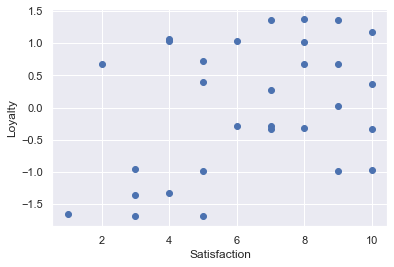

In [6]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [8]:
x = data.copy()
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

In [9]:
clusters = x.copy()
clusters['Cluster'] = kmeans.fit_predict(x)
clusters

,Satisfaction,Loyalty,Cluster
0,4,-1.33,1
1,6,-0.28,1
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,1
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


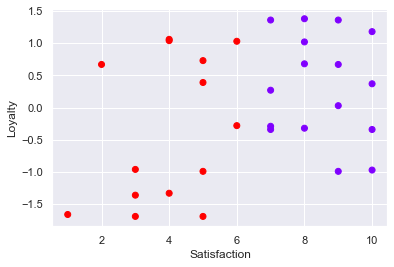

In [10]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['Cluster'], cmap = "rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()

In [14]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x)
x_scaled

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

In [16]:
wcss = []

for i in range (1,10):
    km = KMeans(i)
    km.fit(x_scaled)
    wcss.append(km.inertia_)
    
wcss

C:\Users\sabin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[59.999999999999986,
 29.818973034723143,
 17.913349527387968,
 10.247181805928422,
 7.792695153937187,
 6.54983679159933,
 5.326631124753926,
 4.434309636536097,
 3.7078990061074406]

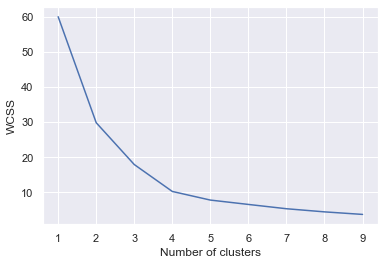

In [18]:
plt.plot(range(1,10), wcss)
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [32]:
kmeans2 = KMeans(9)
kmeans.fit(x_scaled)
clusters2 = kmeans2.fit_predict(x_scaled)
data_wc = x.copy()
data_wc['Clusters'] = clusters2
data_wc

,Satisfaction,Loyalty,Clusters
0,4,-1.33,7
1,6,-0.28,0
2,5,-0.99,7
3,7,-0.29,0
4,4,1.06,8
5,1,-1.66,1
6,10,-0.97,4
7,8,-0.32,0
8,8,1.02,3
9,8,0.68,3


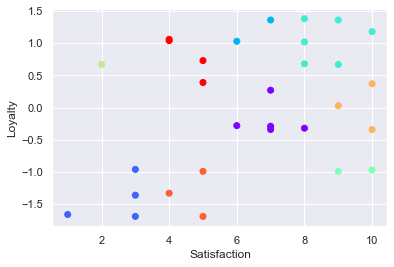

In [33]:
plt.scatter(data_wc['Satisfaction'], data_wc['Loyalty'], c=data_wc['Clusters'], cmap="rainbow")
plt.xlabel("Satisfaction")
plt.ylabel("Loyalty")
plt.show()